# Predicting heart rate to montior Stress level

### Steps
- Data loading and preprocessing
- Exploratory Data Analysis
- Model building and evaluation
- Identify the better parameter using Cross Validation Mean Score
- Hyper Parameters Tuning for the best model identified in above step

In [55]:
#Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set(color_codes=True)
sns.set_style(style='darkgrid') #Update default background style of plots

pd.options.display.float_format = '{:,.2f}'.format #Display all numbers with 2 decimal points

from sklearn.model_selection import train_test_split

from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

#ML model Libraries
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [56]:
# Read the datasets and store in dataframe
df_tm = pd.read_csv("time_domain_features_train.csv") 
df_fq = pd.read_csv("frequency_domain_features_train.csv")
df_nl = pd.read_csv("heart_rate_non_linear_features_train.csv")

In [57]:
df_tm.head(3)

,MEAN_RR,MEDIAN_RR,SDRR,RMSSD,SDSD,SDRR_RMSSD,HR,pNN25,pNN50,KURT,SKEW,MEAN_REL_RR,MEDIAN_REL_RR,SDRR_REL_RR,RMSSD_REL_RR,SDSD_REL_RR,SDRR_RMSSD_REL_RR,KURT_REL_RR,SKEW_REL_RR,uuid
0,885.16,853.76,140.97,15.55,15.55,9.06,69.50,11.13,0.53,-0.86,0.34,-0.00,-0.00,0.02,0.01,0.01,2.14,-0.86,0.34,89df2855-56eb-4706-a23b-b39363dd605a
1,939.43,948.36,81.32,12.96,12.96,6.27,64.36,5.60,0.00,-0.41,-0.16,-0.00,0.00,0.01,0.00,0.00,2.93,-0.41,-0.16,80c795e4-aa56-4cc0-939c-19634b89cbb2
2,898.19,907.01,84.50,16.31,16.31,5.18,67.45,13.07,0.20,0.35,-0.66,-0.00,-0.00,0.02,0.01,0.01,2.13,0.35,-0.66,c2d5d102-967c-487d-88f2-8b005a449f3e


In [58]:
df_fq.head(3)

,uuid,VLF,VLF_PCT,LF,LF_PCT,LF_NU,HF,HF_PCT,HF_NU,TP,LF_HF,HF_LF
0,89df2855-56eb-4706-a23b-b39363dd605a,"2,661.89",72.20,"1,009.25",27.38,98.49,15.52,0.42,1.51,"3,686.67",65.02,0.02
1,80c795e4-aa56-4cc0-939c-19634b89cbb2,"2,314.27",76.98,690.11,22.95,99.70,2.11,0.07,0.30,"3,006.49",327.30,0.00
2,c2d5d102-967c-487d-88f2-8b005a449f3e,"1,373.89",51.15,"1,298.22",48.34,98.95,13.77,0.51,1.05,"2,685.88",94.28,0.01


In [59]:
df_nl.head(3)

,uuid,SD1,SD2,sampen,higuci,datasetId,condition
0,89df2855-56eb-4706-a23b-b39363dd605a,11.00,199.06,2.14,1.16,2,no stress
1,80c795e4-aa56-4cc0-939c-19634b89cbb2,9.17,114.63,2.17,1.08,2,interruption
2,c2d5d102-967c-487d-88f2-8b005a449f3e,11.53,118.94,2.14,1.18,2,interruption


In [60]:
print (df_fq.shape, df_tm.shape, df_nl.shape)

(369289, 12) (369289, 20) (369289, 7)


### Join the three datasets on field "uuid" & get a single dataset

In [61]:
df_jn1 = pd.merge(df_tm,df_fq,how='inner',on='uuid')
df_all = pd.merge(df_jn1,df_nl,how='inner',on='uuid')

In [62]:
df_all.head(3)

,MEAN_RR,MEDIAN_RR,SDRR,RMSSD,SDSD,SDRR_RMSSD,HR,pNN25,pNN50,KURT,...,HF_NU,TP,LF_HF,HF_LF,SD1,SD2,sampen,higuci,datasetId,condition
0,885.16,853.76,140.97,15.55,15.55,9.06,69.50,11.13,0.53,-0.86,...,1.51,"3,686.67",65.02,0.02,11.00,199.06,2.14,1.16,2,no stress
1,939.43,948.36,81.32,12.96,12.96,6.27,64.36,5.60,0.00,-0.41,...,0.30,"3,006.49",327.30,0.00,9.17,114.63,2.17,1.08,2,interruption
2,898.19,907.01,84.50,16.31,16.31,5.18,67.45,13.07,0.20,0.35,...,1.05,"2,685.88",94.28,0.01,11.53,118.94,2.14,1.18,2,interruption


In [63]:
df_all.columns

Index(['MEAN_RR', 'MEDIAN_RR', 'SDRR', 'RMSSD', 'SDSD', 'SDRR_RMSSD', 'HR',
       'pNN25', 'pNN50', 'KURT', 'SKEW', 'MEAN_REL_RR', 'MEDIAN_REL_RR',
       'SDRR_REL_RR', 'RMSSD_REL_RR', 'SDSD_REL_RR', 'SDRR_RMSSD_REL_RR',
       'KURT_REL_RR', 'SKEW_REL_RR', 'uuid', 'VLF', 'VLF_PCT', 'LF', 'LF_PCT',
       'LF_NU', 'HF', 'HF_PCT', 'HF_NU', 'TP', 'LF_HF', 'HF_LF', 'SD1', 'SD2',
       'sampen', 'higuci', 'datasetId', 'condition'],
      dtype='object')

In [64]:
df_all.shape

(369289, 37)

### Split into Train & Test data

In [65]:
def train_test_split(df,sample_size):
    #df_train = pd.DataFrame()
    #df_test = pd.DataFrame()
    df_test = df.sample(frac=sample_size)
    df_train = df[~df.index.isin(df_test.index)]
    return df_train, df_test

df, df_test = train_test_split(df_all,0.20)
print (df.shape,df_test.shape)

(295431, 37) (73858, 37)


### Univariate Analysis

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 295431 entries, 0 to 369288
Data columns (total 37 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   MEAN_RR            295431 non-null  float64
 1   MEDIAN_RR          295431 non-null  float64
 2   SDRR               295431 non-null  float64
 3   RMSSD              295431 non-null  float64
 4   SDSD               295431 non-null  float64
 5   SDRR_RMSSD         295431 non-null  float64
 6   HR                 295431 non-null  float64
 7   pNN25              295431 non-null  float64
 8   pNN50              295431 non-null  float64
 9   KURT               295431 non-null  float64
 10  SKEW               295431 non-null  float64
 11  MEAN_REL_RR        295431 non-null  float64
 12  MEDIAN_REL_RR      295431 non-null  float64
 13  SDRR_REL_RR        295431 non-null  float64
 14  RMSSD_REL_RR       295431 non-null  float64
 15  SDSD_REL_RR        295431 non-null  float64
 16  SD

In [67]:
# Redundant fields
df.drop('datasetId',axis=1,inplace=True)
df.drop('uuid',axis=1,inplace=True)
df.drop('HF_LF',axis=1,inplace=True)
df.drop('SDSD_REL_RR',axis=1,inplace=True)
df.drop('SDSD',axis=1,inplace=True)
df.drop('KURT_REL_RR',axis=1,inplace=True)
df.drop('SKEW_REL_RR',axis=1,inplace=True)

In [68]:
# Total 36 independent and 1 dependent variable
df.columns

Index(['MEAN_RR', 'MEDIAN_RR', 'SDRR', 'RMSSD', 'SDRR_RMSSD', 'HR', 'pNN25',
       'pNN50', 'KURT', 'SKEW', 'MEAN_REL_RR', 'MEDIAN_REL_RR', 'SDRR_REL_RR',
       'RMSSD_REL_RR', 'SDRR_RMSSD_REL_RR', 'VLF', 'VLF_PCT', 'LF', 'LF_PCT',
       'LF_NU', 'HF', 'HF_PCT', 'HF_NU', 'TP', 'LF_HF', 'SD1', 'SD2', 'sampen',
       'higuci', 'condition'],
      dtype='object')

In [69]:
# No NULL values in data 
df.isnull().any()

MEAN_RR              False
MEDIAN_RR            False
SDRR                 False
RMSSD                False
SDRR_RMSSD           False
HR                   False
pNN25                False
pNN50                False
KURT                 False
SKEW                 False
MEAN_REL_RR          False
MEDIAN_REL_RR        False
SDRR_REL_RR          False
RMSSD_REL_RR         False
SDRR_RMSSD_REL_RR    False
VLF                  False
VLF_PCT              False
LF                   False
LF_PCT               False
LF_NU                False
HF                   False
HF_PCT               False
HF_NU                False
TP                   False
LF_HF                False
SD1                  False
SD2                  False
sampen               False
higuci               False
condition            False
dtype: bool

In [70]:
# Check the skewness of the data.
df.skew()

MEAN_RR              0.65
MEDIAN_RR            0.92
SDRR                 2.36
RMSSD                0.40
SDRR_RMSSD           3.71
HR                   0.41
pNN25                1.20
pNN50                1.27
KURT                 5.90
SKEW                 1.23
MEAN_REL_RR          0.12
MEDIAN_REL_RR       -0.95
SDRR_REL_RR          0.87
RMSSD_REL_RR         1.26
SDRR_RMSSD_REL_RR    0.84
VLF                  1.96
VLF_PCT             -0.41
LF                   1.35
LF_PCT               0.43
LF_NU               -1.65
HF                   2.49
HF_PCT               2.02
HF_NU                1.65
TP                   1.45
LF_HF                9.83
SD1                  0.40
SD2                  2.36
sampen              -3.09
higuci               0.33
dtype: float64

#### Inference -
- Fields SDRR_RMSSD, KURT, KURT_REL_RR, LF_HF, sampen are highly skewed
- Fields SDRR, HF, HF_PCT, SD2, HF_LF are skewed

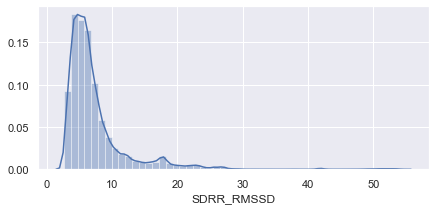

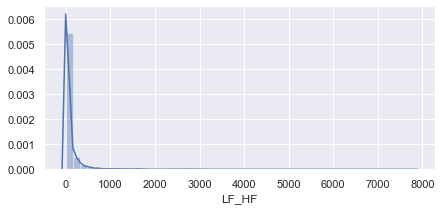

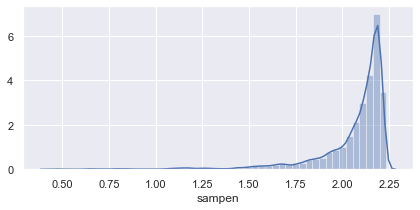

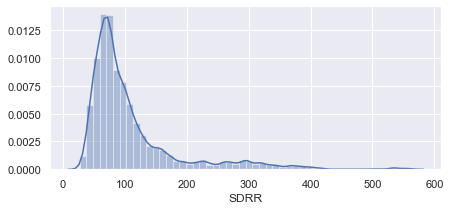

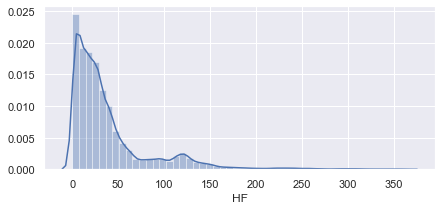

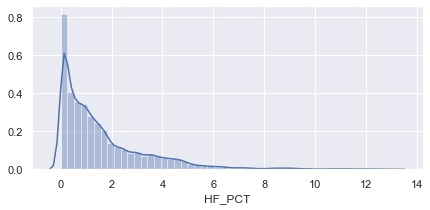

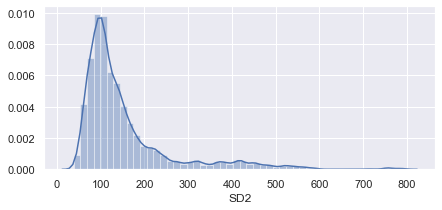

In [71]:
# To see skewness of SDRR_RMSSD, KURT, KURT_REL_RR, LF_HF, sampen, SDRR, HF, HF_PCT, SD2, HF_LF
for i in ['SDRR_RMSSD','LF_HF','sampen','SDRR','HF','HF_PCT','SD2']:
    plt.figure(figsize = (7,3))
    sns.distplot(df[i], kde=True);
    plt.show()

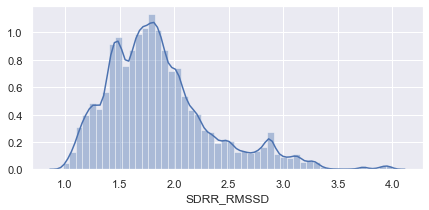

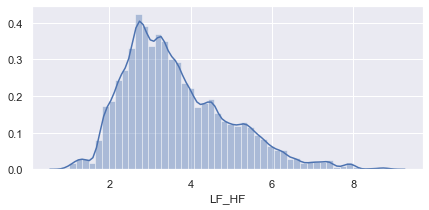

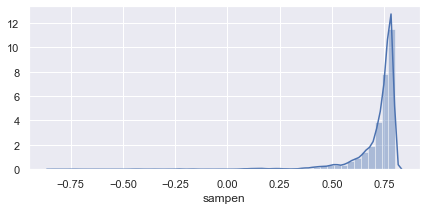

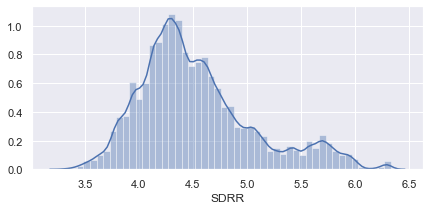

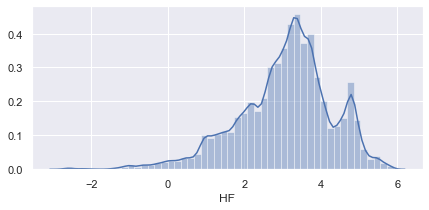

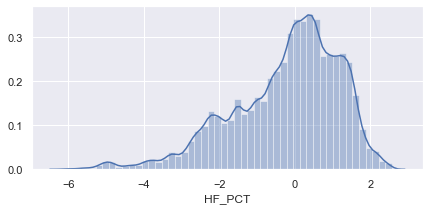

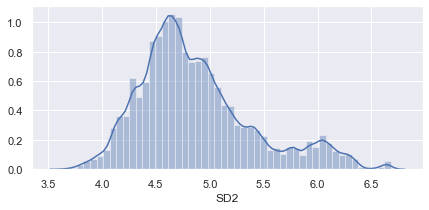

In [72]:
# To apply log transformation to reduce skewness of SDRR_RMSSD, KURT, KURT_REL_RR, LF_HF, sampen, SDRR, HF, HF_PCT, SD2, HF_LF
for i in ['SDRR_RMSSD','LF_HF','sampen','SDRR','HF','HF_PCT','SD2']:
    plt.figure(figsize = (7,3))
    sns.distplot(np.log(df[i]), kde=True);
    plt.show()

In [73]:
# Apply log transformation
def log_transfm(df):
    for i in ['SDRR_RMSSD','LF_HF','sampen','SDRR','HF','HF_PCT','SD2']:
        df[i] = np.log(df[i])

log_transfm(df)

In [74]:
# Check the skewness of the data.
df.skew()

MEAN_RR              0.65
MEDIAN_RR            0.92
SDRR                 0.89
RMSSD                0.40
SDRR_RMSSD           1.08
HR                   0.41
pNN25                1.20
pNN50                1.27
KURT                 5.90
SKEW                 1.23
MEAN_REL_RR          0.12
MEDIAN_REL_RR       -0.95
SDRR_REL_RR          0.87
RMSSD_REL_RR         1.26
SDRR_RMSSD_REL_RR    0.84
VLF                  1.96
VLF_PCT             -0.41
LF                   1.35
LF_PCT               0.43
LF_NU               -1.65
HF                  -0.67
HF_PCT              -0.85
HF_NU                1.65
TP                   1.45
LF_HF                0.86
SD1                  0.40
SD2                  0.89
sampen              -4.69
higuci               0.33
dtype: float64

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 295431 entries, 0 to 369288
Data columns (total 30 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   MEAN_RR            295431 non-null  float64
 1   MEDIAN_RR          295431 non-null  float64
 2   SDRR               295431 non-null  float64
 3   RMSSD              295431 non-null  float64
 4   SDRR_RMSSD         295431 non-null  float64
 5   HR                 295431 non-null  float64
 6   pNN25              295431 non-null  float64
 7   pNN50              295431 non-null  float64
 8   KURT               295431 non-null  float64
 9   SKEW               295431 non-null  float64
 10  MEAN_REL_RR        295431 non-null  float64
 11  MEDIAN_REL_RR      295431 non-null  float64
 12  SDRR_REL_RR        295431 non-null  float64
 13  RMSSD_REL_RR       295431 non-null  float64
 14  SDRR_RMSSD_REL_RR  295431 non-null  float64
 15  VLF                295431 non-null  float64
 16  VL

### Scaling the Train data

In [76]:
#Here we are going to use StandardScaler to scale our data.
from sklearn.preprocessing import StandardScaler


sc_X = StandardScaler()
sc_Y = StandardScaler()
x_cols_to_scale = ['MEAN_RR', 'MEDIAN_RR', 'SDRR', 'RMSSD', 'SDRR_RMSSD','pNN25', 'pNN50', 'KURT', 'SKEW', 'MEAN_REL_RR', 'MEDIAN_REL_RR',
       'SDRR_REL_RR', 'RMSSD_REL_RR', 'SDRR_RMSSD_REL_RR','VLF', 'VLF_PCT', 'LF', 'LF_PCT', 'LF_NU',
       'HF', 'HF_PCT', 'HF_NU', 'TP', 'LF_HF', 'SD1', 'SD2', 'sampen','higuci']
y_cols_to_scale = ['HR']
df[x_cols_to_scale] = sc_X.fit_transform(df[x_cols_to_scale].to_numpy())
df[y_cols_to_scale] = sc_Y.fit_transform(df[y_cols_to_scale].to_numpy())



### Print the descriptive statistics of all the columns using describe() function

In [77]:
df.describe().transpose()

## Inference -
# There is a huge variance in mean and median of following fields, which shows the possibility of data skewness -
#SDRR
#pNN50
#KURT
#SKEW
#SKEW_REL_RR
#VLF
#LF
#HF
#TP
#LF_HF
#SD2

,count,mean,std,min,25%,50%,75%,max
MEAN_RR,"295,431.00",-0.00,1.00,-2.40,-0.69,-0.19,0.62,3.81
MEDIAN_RR,"295,431.00",0.00,1.00,-2.45,-0.65,-0.17,0.57,6.13
SDRR,"295,431.00",0.00,1.00,-2.28,-0.68,-0.21,0.46,3.37
RMSSD,"295,431.00",0.00,1.00,-2.29,-0.76,-0.14,0.72,2.83
SDRR_RMSSD,"295,431.00",-0.00,1.00,-1.82,-0.71,-0.16,0.43,4.41
HR,"295,431.00",0.00,1.00,-2.44,-0.70,0.03,0.62,3.85
pNN25,"295,431.00",0.00,1.00,-1.20,-0.75,-0.27,0.42,3.61
pNN50,"295,431.00",0.00,1.00,-0.87,-0.87,-0.40,0.54,4.58
KURT,"295,431.00",0.00,1.00,-1.35,-0.49,-0.27,0.11,35.37
SKEW,"295,431.00",-0.00,1.00,-3.11,-0.57,-0.15,0.34,9.62


#### Using univariate analysis to check the individual attributes for their basic statistic such as central values, spread, tails, outliers, etc

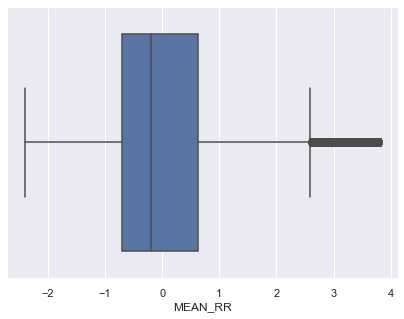

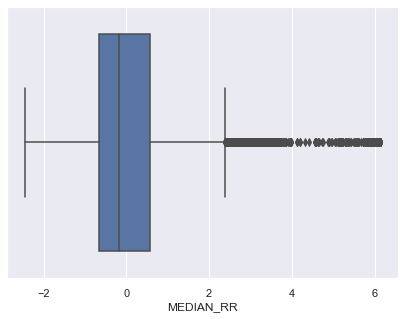

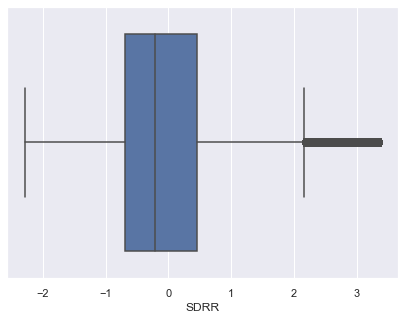

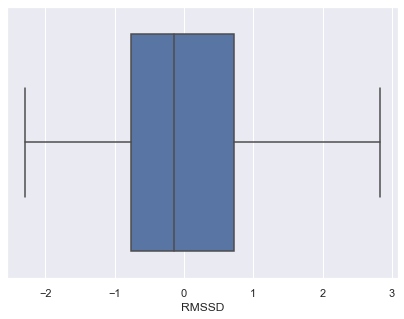

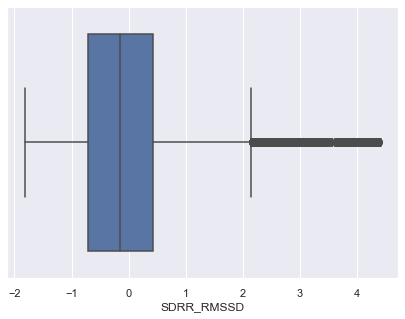

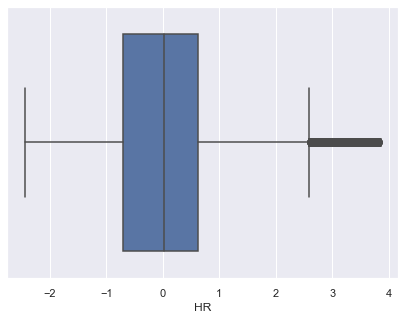

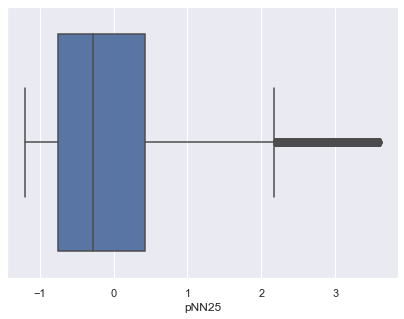

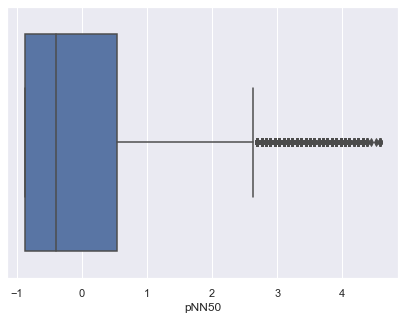

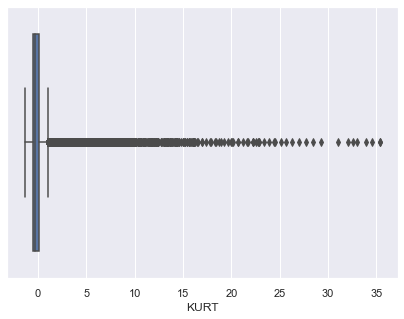

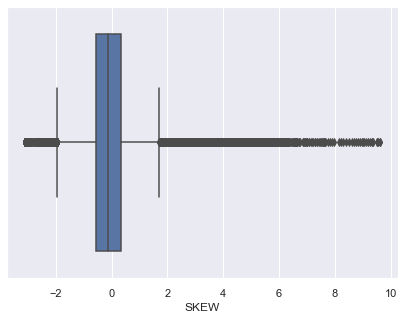

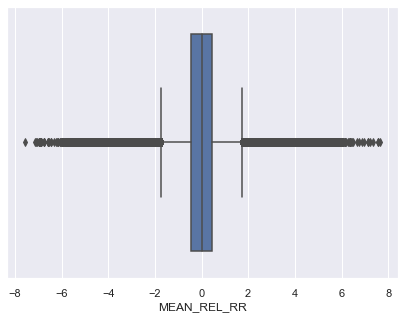

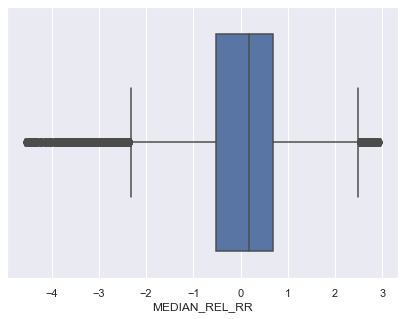

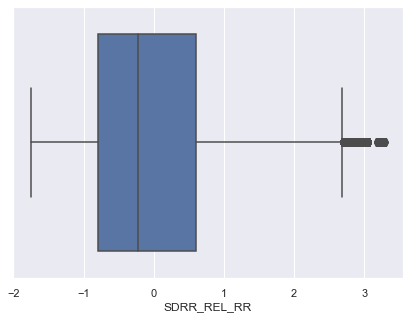

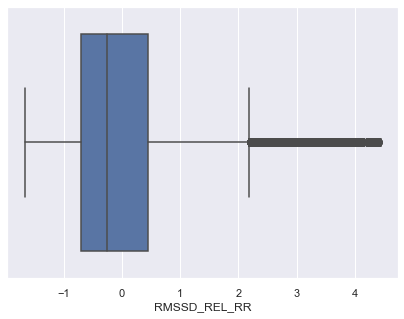

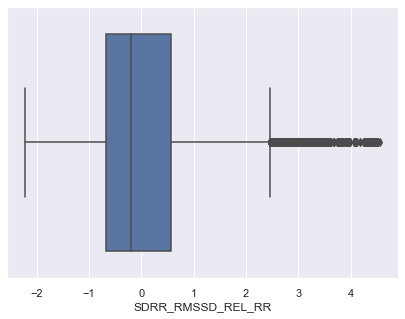

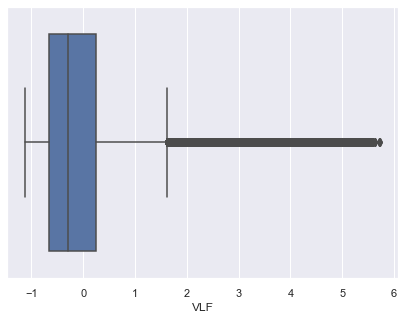

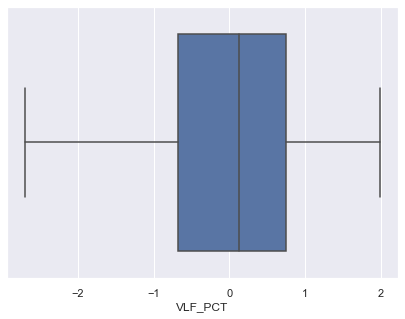

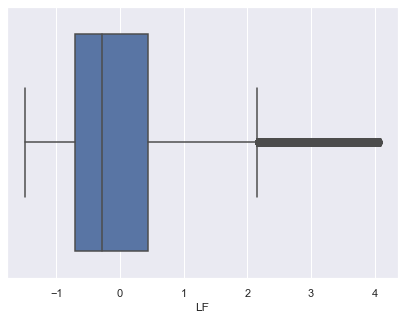

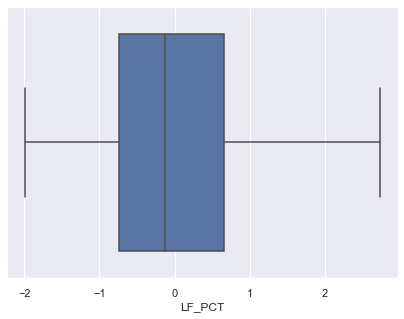

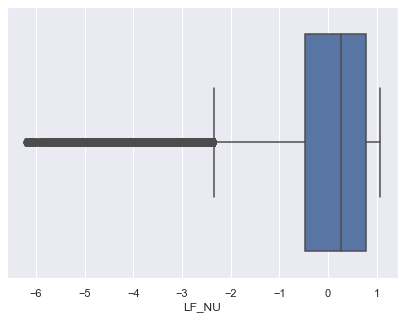

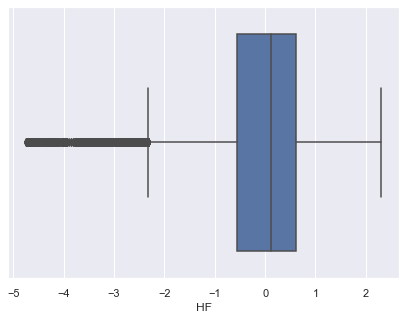

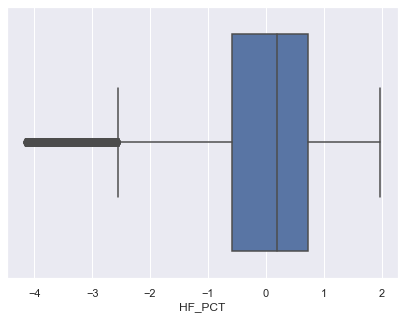

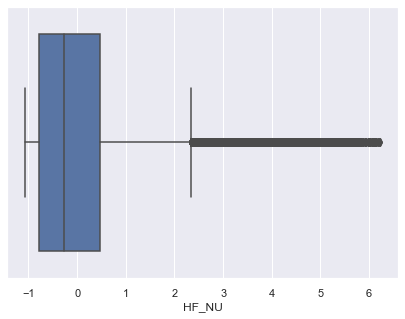

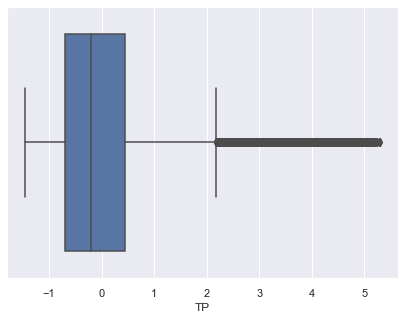

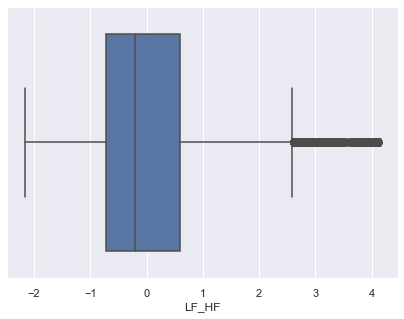

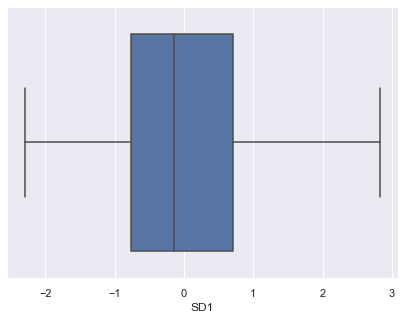

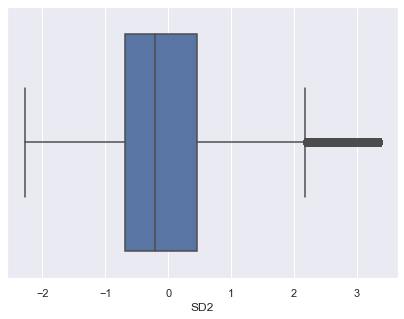

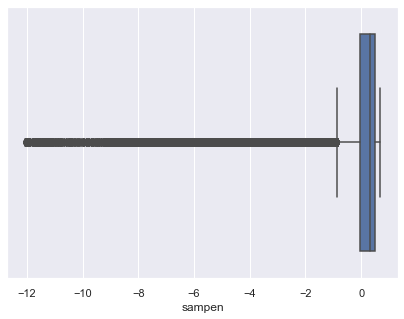

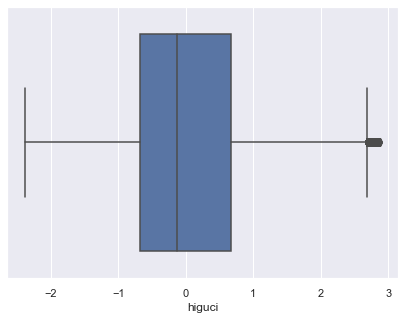

In [78]:
for i in df.select_dtypes('number').columns:
    plt.figure(figsize = (7,5))
    sns.boxplot(df[i])
    plt.show()

Mean:  1.1419320864270058e-15 
Median:  0.026114345744407824 
Mode:  -2.436808953525227


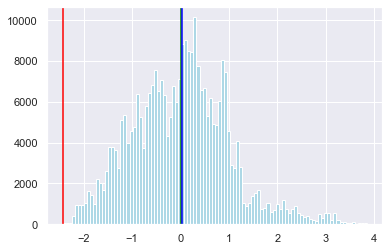

In [79]:

# Analysing the mean, median and mode of Target field "HR"

mean = df['HR'].mean()
median = df['HR'].median()
mode = df['HR'].mode()
print ('Mean: ',mean,'\nMedian: ',median,'\nMode: ',mode[0])
plt.hist(df['HR'],bins=100, color='lightblue')
plt.axvline(mean,color='green',label='Mean')
plt.axvline(median,color='blue',label='Median')
plt.axvline(mode[0],color='red',label='Mode')

### Multivariate Analysis

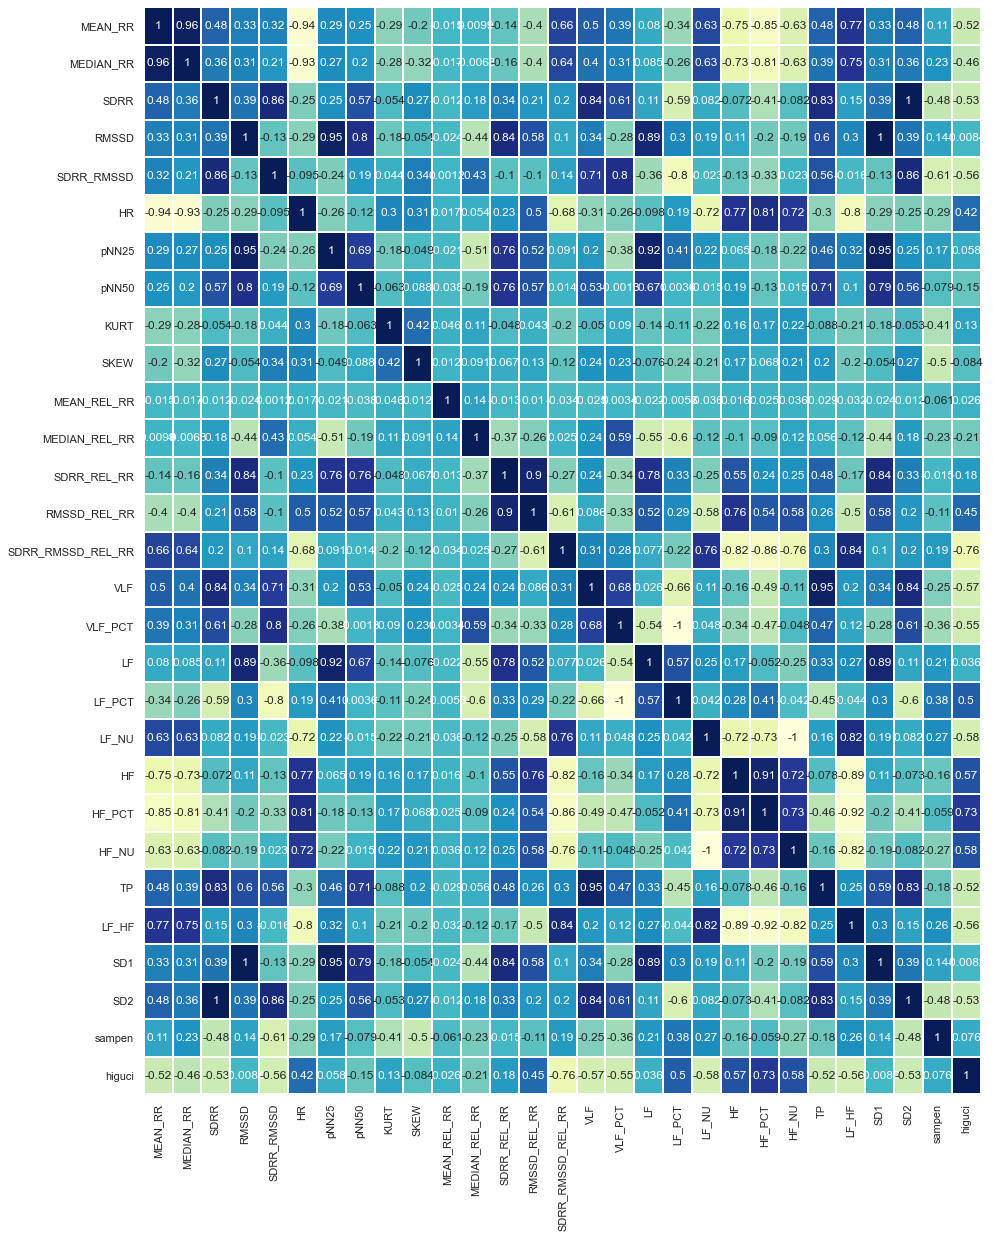

In [80]:
## Correlation betweeen all numeric fields

plt.figure(figsize=(15,20))

sns.heatmap(df.corr(),
            annot=True,
            linewidths=1,
            center=0,
            cbar=False,
            cmap="YlGnBu")

plt.show()

### Inference from Correlation heat map -

- High co-relation between following fields 
- MEAN_RR & MEDIAN_RR
- SDRR_RMSSD & SDRR
- SD2 & SDRR
- SD1 & RMSSD
- SD2 & SDRR_RMSSD
- SD1 & pNN25
- TP & VLF
- SKEW_REL_RR & SKEW
- KURT_REL_RR & KURT
- LF & pNN25
- SDSD & RMSSD
- SDRR & SDRR_RMSSD
- RMSSD & pNN25

In [81]:
#df.drop('MEAN_RR',axis=1,inplace=True)
#df.drop('SD1',axis=1,inplace=True)
#df.drop('SD2',axis=1,inplace=True)
#df.drop('KURT',axis=1,inplace=True)
#df.drop('SKEW',axis=1,inplace=True)
#df.drop('TP',axis=1,inplace=True)
#df.drop('LF',axis=1,inplace=True)
#df.drop('SDSD',axis=1,inplace=True)
#df.drop('SDRR',axis=1,inplace=True)
#df.drop('RMSSD',axis=1,inplace=True)
#df.drop('SDSD_REL_RR',axis=1,inplace=True)
#df.drop('HF_LF',axis=1,inplace=True)
#df.drop('SDRR_REL_RR',axis=1,inplace=True)
#df.drop('HF',axis=1,inplace=True)
#df.drop('LF_PCT',axis=1,inplace=True)
#df.drop('LF_NU',axis=1,inplace=True)
#df.drop('HF_NU',axis=1,inplace=True)

In [82]:
#df.drop('MEDIAN_RR',axis=1,inplace=True) 
#df.drop('SD1',axis=1,inplace=True)
#df.drop('SD2',axis=1,inplace=True)
#df.drop('HF_LF',axis=1,inplace=True)
#df.drop('VLF',axis=1,inplace=True)
#df.drop('HF_PCT',axis=1,inplace=True)
#df.drop('LF',axis=1,inplace=True)
#df.drop('KURT',axis=1,inplace=True)
#df.drop('SKEW',axis=1,inplace=True)
#df.drop('SDRR_REL_RR',axis=1,inplace=True)
#df.drop('RMSSD',axis=1,inplace=True)
#df.drop('SDSD',axis=1,inplace=True)
#df.drop('SDSD_REL_RR',axis=1,inplace=True)
#df.drop('SDRR_RMSSD',axis=1,inplace=True)
#df.drop('SDRR_RMSSD_REL_RR',axis=1,inplace=True)
#df.drop('LF_NU',axis=1,inplace=True)
#df.drop('HF_NU',axis=1,inplace=True)

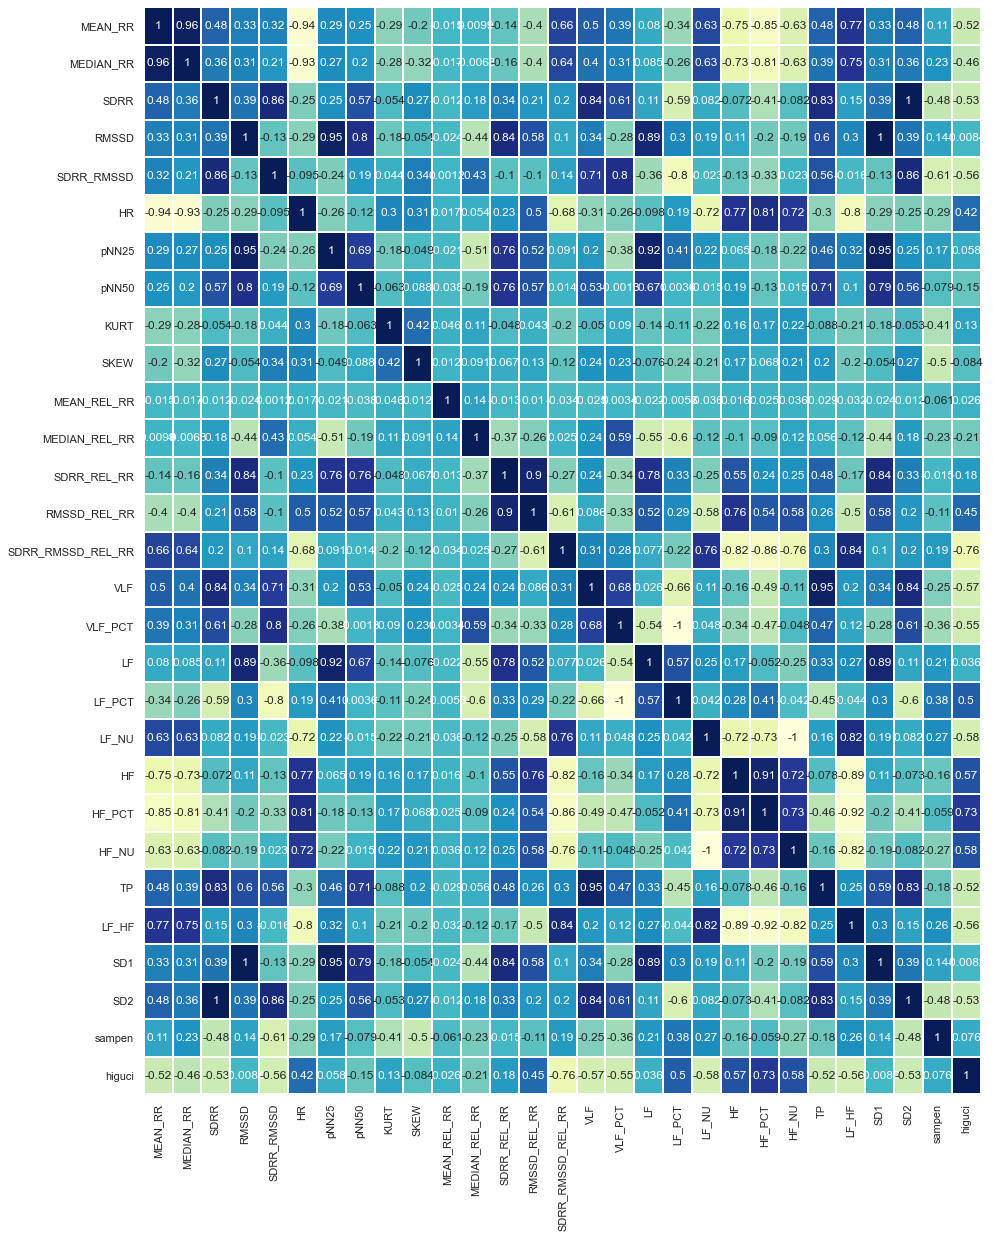

In [83]:
## Correlation betweeen all numeric fields

plt.figure(figsize=(15,20))

sns.heatmap(df.corr(),
            annot=True,
            linewidths=1,
            center=0,
            cbar=False,
            cmap="YlGnBu")

plt.show()

## Getting the Model Ready
#### Splitting into x & y arrays holding dependent and independent variables

In [84]:
mapping = {'no stress':1,'interruption':2,'time pressure':3}
df['condition'] = df['condition'].replace(mapping)

In [85]:
# Separate the independent attributes i.e. every column except Strength
# Store the target column (Strength) into Y array

x_train = df.loc[:, df.columns != 'HR']  # independent variables
y_train = df.loc[:, df.columns == 'HR']  # Target variable

In [86]:
print (x_train.shape, y_train.shape)

(295431, 29) (295431, 1)


In [87]:
x_train

,MEAN_RR,MEDIAN_RR,SDRR,RMSSD,SDRR_RMSSD,pNN25,pNN50,KURT,SKEW,MEAN_REL_RR,...,HF,HF_PCT,HF_NU,TP,LF_HF,SD1,SD2,sampen,higuci,condition
0,0.31,0.09,0.79,0.14,0.71,0.16,-0.34,-0.77,0.42,-1.24,...,-0.26,-0.45,-0.71,0.26,0.43,0.14,0.79,0.34,-0.30,1
2,0.41,0.49,-0.17,0.32,-0.44,0.39,-0.67,-0.10,-1.00,-0.06,...,-0.36,-0.31,-0.82,-0.26,0.72,0.32,-0.17,0.32,-0.10,2
4,-0.30,-0.23,-0.72,1.03,-1.39,1.26,-0.67,-0.60,-0.28,-0.60,...,0.66,0.59,-0.28,-0.29,-0.19,1.03,-0.74,0.63,1.08,1
5,0.61,-1.69,3.21,-1.22,4.31,-1.05,-0.27,-0.79,1.41,4.61,...,-0.54,-0.64,0.57,0.14,-0.78,-1.22,3.21,-9.79,-0.86,1
6,1.02,0.93,-0.22,-1.05,0.39,-0.96,-0.87,-0.54,0.09,-0.75,...,-2.16,-1.33,-1.00,-1.01,1.68,-1.05,-0.21,0.42,-0.39,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369284,-1.01,-0.91,-1.74,-1.30,-1.09,-1.09,-0.87,0.27,0.05,0.10,...,0.47,1.41,1.56,-1.32,-1.18,-1.30,-1.74,0.18,2.13,1
369285,1.10,1.03,-0.39,-0.29,-0.34,-0.43,-0.67,-0.15,0.18,-0.67,...,-1.72,-1.37,-0.99,-0.47,1.56,-0.29,-0.39,0.31,-0.10,1
369286,1.43,1.38,0.05,1.96,-0.91,2.51,1.21,-0.53,-0.17,-1.32,...,-1.30,-1.47,-1.03,0.60,2.09,1.96,0.05,0.61,-0.67,1
369287,-0.39,-0.29,-0.31,0.43,-0.65,0.02,0.61,0.04,-0.97,0.16,...,0.64,0.49,-0.22,-0.13,-0.24,0.43,-0.31,0.16,-0.00,1


### Prepare the Test Data

In [88]:
print(df_test.shape)

# Apply log transformation
log_transfm(df_test)

# Apply Standard Scaling
df_test[x_cols_to_scale] = sc_X.transform(df_test[x_cols_to_scale].to_numpy())
df_test[y_cols_to_scale] = sc_Y.transform(df_test[y_cols_to_scale].to_numpy())

# Apply mapping
mapping = {'no stress':1,'interruption':2,'time pressure':3}
df_test['condition'] = df_test['condition'].replace(mapping)

x_test = df_test.loc[:, df_test.columns != 'HR']  # independent variables
y_test = df_test.loc[:, df_test.columns == 'HR']  # Target variable

(73858, 37)


In [89]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73858 entries, 279026 to 54556
Data columns (total 36 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MEAN_RR            73858 non-null  float64
 1   MEDIAN_RR          73858 non-null  float64
 2   SDRR               73858 non-null  float64
 3   RMSSD              73858 non-null  float64
 4   SDSD               73858 non-null  float64
 5   SDRR_RMSSD         73858 non-null  float64
 6   pNN25              73858 non-null  float64
 7   pNN50              73858 non-null  float64
 8   KURT               73858 non-null  float64
 9   SKEW               73858 non-null  float64
 10  MEAN_REL_RR        73858 non-null  float64
 11  MEDIAN_REL_RR      73858 non-null  float64
 12  SDRR_REL_RR        73858 non-null  float64
 13  RMSSD_REL_RR       73858 non-null  float64
 14  SDSD_REL_RR        73858 non-null  float64
 15  SDRR_RMSSD_REL_RR  73858 non-null  float64
 16  KURT_REL_RR      

In [90]:
#x_test.drop('MEDIAN_RR',axis=1,inplace=True) 
#x_test.drop('SD1',axis=1,inplace=True)
#x_test.drop('SD2',axis=1,inplace=True)
#x_test.drop('HF_LF',axis=1,inplace=True)
#x_test.drop('VLF',axis=1,inplace=True)
#x_test.drop('HF_PCT',axis=1,inplace=True)
#x_test.drop('LF',axis=1,inplace=True)
#x_test.drop('KURT',axis=1,inplace=True)
#x_test.drop('SKEW',axis=1,inplace=True)
#x_test.drop('SDRR_REL_RR',axis=1,inplace=True)
#x_test.drop('RMSSD',axis=1,inplace=True)
#x_test.drop('SDSD',axis=1,inplace=True)
#x_test.drop('SDSD_REL_RR',axis=1,inplace=True)
#x_test.drop('SDRR_RMSSD',axis=1,inplace=True)
#x_test.drop('SDRR_RMSSD_REL_RR',axis=1,inplace=True)
#x_test.drop('LF_NU',axis=1,inplace=True)
#x_test.drop('HF_NU',axis=1,inplace=True)
x_test.drop('datasetId',axis=1,inplace=True)
x_test.drop('uuid',axis=1,inplace=True)
x_test.drop('HF_LF',axis=1,inplace=True)
x_test.drop('SDSD_REL_RR',axis=1,inplace=True)
x_test.drop('SDSD',axis=1,inplace=True)
x_test.drop('KURT_REL_RR',axis=1,inplace=True)
x_test.drop('SKEW_REL_RR',axis=1,inplace=True)

### Applying Linear Regression (Quadratic - 2 degrees)

In [91]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73858 entries, 279026 to 54556
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MEAN_RR            73858 non-null  float64
 1   MEDIAN_RR          73858 non-null  float64
 2   SDRR               73858 non-null  float64
 3   RMSSD              73858 non-null  float64
 4   SDRR_RMSSD         73858 non-null  float64
 5   pNN25              73858 non-null  float64
 6   pNN50              73858 non-null  float64
 7   KURT               73858 non-null  float64
 8   SKEW               73858 non-null  float64
 9   MEAN_REL_RR        73858 non-null  float64
 10  MEDIAN_REL_RR      73858 non-null  float64
 11  SDRR_REL_RR        73858 non-null  float64
 12  RMSSD_REL_RR       73858 non-null  float64
 13  SDRR_RMSSD_REL_RR  73858 non-null  float64
 14  VLF                73858 non-null  float64
 15  VLF_PCT            73858 non-null  float64
 16  LF               

In [92]:
# Linear Regression

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

polynomial_features= PolynomialFeatures(degree=2)
x_poly_train = polynomial_features.fit_transform(x_train)
x_poly_test = polynomial_features.fit_transform(x_test)

linearregression = LinearRegression()                                    
linearregression.fit(x_poly_train, y_train)                                  

print("Intercept of the linear equation:", linearregression.intercept_) 
print("\nCOefficients of the equation are:", linearregression.coef_)

pred = linearregression.predict(x_poly_test) 

Intercept of the linear equation: [1.45390194e+08]

COefficients of the equation are: [[ 4.95323660e-09 -1.14218838e+00 -1.44345829e-02 -2.67102874e+02
  -6.46025192e+00 -7.26586602e+00 -2.51969856e-02 -1.58515549e-02
   4.66506895e-03 -2.99616938e-02 -1.45532552e-03  3.01712740e-03
   9.80402663e+07 -1.40653824e+08 -6.56663472e+07  5.02275169e+08
  -4.65684440e+08 -4.88701489e+08  1.19006662e+08  1.23441415e+09
   3.44357652e+00 -4.40385757e+00  1.17461487e+09  2.13501081e+08
  -2.28840842e-01  3.23734120e+00  2.74429133e+02 -1.42882599e-02
   8.04241526e-03 -7.51401692e-03  1.36844513e-01 -3.68387781e-02
  -1.97610642e+00 -5.83141042e+00 -2.37662733e-01 -8.50480888e-02
  -5.24192294e-02  2.92071998e-02 -6.94891512e-02 -3.01283598e-03
   2.95890868e-03 -8.70954618e-02  4.09101453e-02  3.49359363e-02
   1.56640977e-01  8.67858335e-01  1.36525325e-01  7.01929912e-01
   8.54739355e+08 -3.10557231e-01  5.26328728e-01  8.54739355e+08
  -1.09966442e-01  9.34928060e-02  5.93286417e+00  2.185

In [93]:
#Regression Metrics
RMSE_LR = mean_squared_error(y_test, pred)**0.5
Score_LR = linearregression.score(x_poly_test, y_test)
MAE_LR = mean_absolute_error(y_test, pred)

print("Mean Absolute Error : ",MAE_LR)
print ("Root Mean Squared Error : ",RMSE_LR)
print ("R2 Squared : ",r2_score(y_test, pred))
print ("Training Score : ",linearregression.score(x_poly_train, y_train))
print ("Testing Score : ",Score_LR)

Mean Absolute Error :  0.006173986808747606
Root Mean Squared Error :  0.009177555691305085
R2 Squared :  0.9999154371633934
Training Score :  0.9999164067469946
Testing Score :  0.9999154371633934


In [94]:
#Store the score for each model in a dataframe for final comparison
resultsDf = pd.DataFrame({'Method':['Linear Regression'],'MAE':MAE_LR,'Score':Score_LR})
resultsDf = resultsDf[['Method','MAE','Score']]
resultsDf

,Method,MAE,Score
0,Linear Regression,0.01,1.00


In [ ]:
randomCV_lr.fit(x_poly_train, y_train)

### Decision Tree

In [116]:
#decision Tree
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(max_depth=5)

dt.fit(x_train, y_train)

Score_DT = dt.score(x_test, y_test)
pred_dt = dt.predict(x_test)
RMSE_DT = mean_squared_error(y_test, pred_dt)**0.5
MAE_DT = mean_absolute_error(y_test, pred_dt)
print("Mean Absolute Error : ",MAE_DT)
print ("Root Mean Squared Error : ",RMSE_DT)
print("Training Score : ",dt.score(x_train, y_train))  # performance on train data
print("Testing Score : ",Score_DT)  # performance on test data

Mean Absolute Error :  0.09589632107902518
Root Mean Squared Error :  0.14192726059122107
Training Score :  0.9802510605128953
Testing Score :  0.9797764624303621


In [117]:
## Feature Importance of Decision Tree
pd.Series(dt.feature_importances_, x_train.columns ).sort_values(ascending= False)

MEDIAN_RR           0.73
MEAN_RR             0.25
HF_PCT              0.01
HF                  0.00
SDRR                0.00
SD2                 0.00
RMSSD_REL_RR        0.00
higuci              0.00
RMSSD               0.00
SDRR_RMSSD          0.00
pNN25               0.00
SDRR_REL_RR         0.00
pNN50               0.00
KURT                0.00
SKEW                0.00
MEAN_REL_RR         0.00
MEDIAN_REL_RR       0.00
condition           0.00
SDRR_RMSSD_REL_RR   0.00
VLF_PCT             0.00
LF                  0.00
LF_PCT              0.00
LF_NU               0.00
HF_NU               0.00
TP                  0.00
LF_HF               0.00
SD1                 0.00
sampen              0.00
VLF                 0.00
dtype: float64

In [112]:
#Store the score for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Decision Tree'],'MAE':MAE_DT,'Score':Score_DT})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf

,Method,MAE,Score
0,Linear Regression,0.01,1.00
0,Decision Tree,0.10,0.98


In [119]:
#Hyper tuning
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor


# specify parameters and distributions to sample from
param_grid = {'min_samples_leaf':[5,6,7,8,9],
              "max_depth": [6,7,8],
              'min_samples_split': [4,5,6,7,8,9,10]
              }

dt = DecisionTreeRegressor()

randomCV_dt = RandomizedSearchCV(dt, param_distributions=param_grid, cv=5)
#GridCV_XG = GridSearchCV(xg, param_grid, cv=10)

In [120]:
randomCV_dt.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(),
                   param_distributions={'max_depth': [6, 7, 8],
                                        'min_samples_leaf': [5, 6, 7, 8, 9],
                                        'min_samples_split': [4, 5, 6, 7, 8, 9,
                                                              10]})

In [121]:
randomCV_dt.cv_results_['mean_test_score'].mean()

0.9920299802225652

In [122]:
mean = randomCV_dt.best_score_
std = randomCV_dt.cv_results_['mean_test_score'].std()


print(f"Mean validation score: {mean}")
print(f"Validation standard deviation: {std}")
print(f"95% confidence interval: {str(round(mean-(1.96*std),3)) + ' <-> ' + str(round(mean+(1.96*std),3))}")
print(f"Best parameters: {randomCV_dt.best_params_}")
print(f"Test score: {randomCV_dt.score(x_test, y_test)}")

Mean validation score: 0.9955334422272999
Validation standard deviation: 0.0030653921507566256
95% confidence interval: 0.99 <-> 1.002
Best parameters: {'min_samples_split': 8, 'min_samples_leaf': 5, 'max_depth': 8}
Test score: 0.9953830712417718


### Random Forest

In [141]:
#Random Forest
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(max_depth=6)

rf.fit(x_train, y_train)

Score_RF = rf.score(x_test, y_test)
pred_rf = rf.predict(x_test)
RMSE_RF = mean_squared_error(y_test, pred_rf)**0.5
MAE_RF = mean_absolute_error(y_test, pred_rf)

print("Mean Absolute Error : ",MAE_RF)
print ("Root Mean Squared Error : ",RMSE_RF)
print("Training Score :",rf.score(x_train, y_train))  # performance on train data
print("Testing Score : ",Score_RF)  # performance on test data

Mean Absolute Error :  0.06347916265763963
Root Mean Squared Error :  0.09936822902010485
Training Score : 0.9903684419715564
Testing Score :  0.9900866466820769


In [143]:
## Feature Importance of RandomForest
pd.Series(rf.feature_importances_, x_train.columns).sort_values(ascending= False)

MEDIAN_RR           0.74
MEAN_RR             0.24
HF_PCT              0.01
HF                  0.00
SDRR                0.00
SD2                 0.00
RMSSD_REL_RR        0.00
higuci              0.00
SDRR_RMSSD          0.00
sampen              0.00
SDRR_REL_RR         0.00
SDRR_RMSSD_REL_RR   0.00
HF_NU               0.00
LF_HF               0.00
TP                  0.00
LF_NU               0.00
KURT                0.00
LF_PCT              0.00
LF                  0.00
pNN25               0.00
VLF_PCT             0.00
VLF                 0.00
pNN50               0.00
RMSSD               0.00
MEDIAN_REL_RR       0.00
SKEW                0.00
MEAN_REL_RR         0.00
SD1                 0.00
condition           0.00
dtype: float64

In [149]:
#Hyper tuning
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor


# specify parameters and distributions to sample from
param_grid = {"max_depth": [8],
              'n_estimators': [350],
              "min_samples_split" : [8]
                           }

rf = RandomForestRegressor()

randomCV_rf = RandomizedSearchCV(rf, param_distributions=param_grid, cv=3)
#GridCV_XG = GridSearchCV(xg, param_grid, cv=10)

In [150]:
randomCV_rf.fit(x_train, y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [8],
                                        'min_samples_split': [8],
                                        'n_estimators': [350]})

In [152]:
mean = randomCV_rf.best_score_
std = randomCV_rf.cv_results_['mean_test_score'].std()


print(f"Mean validation score: {mean}")
print(f"Validation standard deviation: {std}")
print(f"95% confidence interval: {str(round(mean-(1.96*std),3)) + ' <-> ' + str(round(mean+(1.96*std),3))}")
print(f"Best parameters: {randomCV_rf.best_params_}")
print(f"Test score: {randomCV_rf.score(x_test, y_test)}")

Mean validation score: 0.9970920295195125
Validation standard deviation: 0.0
95% confidence interval: 0.997 <-> 0.997
Best parameters: {'n_estimators': 350, 'min_samples_split': 8, 'max_depth': 8}
Test score: 0.9970373876187227


In [115]:
#Store the score for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Random Forest'],'MAE':MAE_RF,'Score':Score_RF})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf

,Method,MAE,Score
0,Linear Regression,0.01,1.00
0,Decision Tree,0.10,0.98
0,Random Forest,0.07,0.99


### Apply Adaboost Ensemble Algorithm

In [116]:
# Adaboost
from sklearn.ensemble import AdaBoostRegressor
abr = AdaBoostRegressor(n_estimators=80)
abr.fit(x_train, y_train)

Score_AB = abr.score(x_test, y_test)
pred_ab = abr.predict(x_test)
RMSE_AB = mean_squared_error(y_test, pred_ab)**0.5
MAE_AB = mean_absolute_error(y_test, pred_ab)

print("Mean Absolute Error : ",MAE_AB)
print ("Root Mean Squared Error : ",RMSE_AB)
print("Training Score :",abr.score(x_train, y_train))  # performance on train data
print("Testing Score : ",Score_AB)  # performance on test data

Mean Absolute Error :  0.1576734978802237
Root Mean Squared Error :  0.17913205110089847
Training Score : 0.9680345993722542
Testing Score :  0.9679084438141088


In [117]:
#Store the score for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Adaboost'],'MAE':MAE_AB,'Score':Score_AB})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf

,Method,MAE,Score
0,Linear Regression,0.01,1.00
0,Decision Tree,0.10,0.98
0,Random Forest,0.07,0.99
0,Adaboost,0.16,0.97


### Apply Bagging Regression Algorithm

In [118]:
# Bagging
from sklearn.ensemble import BaggingRegressor

bgr = BaggingRegressor(n_estimators=80)
bgr.fit(x_train, y_train)

Score_BG = bgr.score(x_test, y_test)
pred_bgr = bgr.predict(x_test)
RMSE_BG = mean_squared_error(y_test, pred_bgr)**0.5
MAE_BG = mean_absolute_error(y_test, pred_bgr)

print("Mean Absolute Error : ",MAE_BG)
print ("Root Mean Squared Error : ",RMSE_BG)
print("Training Score :",bgr.score(x_train, y_train))  # performance on train data
print("Testing Score : ",Score_BG)  # performance on test data
print (pred_bgr)

Mean Absolute Error :  0.0007622283179122174
Root Mean Squared Error :  0.0030210978634179868
Training Score : 0.9999981626525204
Testing Score :  0.9999908720391747
[ 0.15901139 -2.02384834 -0.45062091 ...  3.17539005  0.91903962
  0.02284578]


In [119]:
#Store the score for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Bagging'],'MAE':MAE_BG, 'Score':Score_BG})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf

,Method,MAE,Score
0,Linear Regression,0.01,1.00
0,Decision Tree,0.10,0.98
0,Random Forest,0.07,0.99
0,Adaboost,0.16,0.97
0,Bagging,0.00,1.00


### Apply GradientBoost Regression Algorithm

In [120]:
# Gradient Boost 
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(max_depth=5)
gbr.fit(x_train, y_train)

Score_GB = gbr.score(x_test, y_test)
pred_gbr = gbr.predict(x_test)
RMSE_GB = mean_squared_error(y_test, pred_gbr)**0.5
MAE_GB = mean_absolute_error(y_test, pred_gbr)

print("Mean Absolute Error : ",MAE_GB)
print ("Root Mean Squared Error : ",RMSE_GB)
print("Training Score :",gbr.score(x_train, y_train))  # performance on train data
print("Testing Score : ",Score_GB)  # performance on test data

Mean Absolute Error :  0.014689549253408747
Root Mean Squared Error :  0.022557119471083614
Training Score : 0.9995226675389768
Testing Score :  0.9994911245967568


In [121]:
#Store the score for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Gradient Boost'],'MAE':MAE_GB,'Score':Score_GB})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf

,Method,MAE,Score
0,Linear Regression,0.01,1.00
0,Decision Tree,0.10,0.98
0,Random Forest,0.07,0.99
0,Adaboost,0.16,0.97
0,Bagging,0.00,1.00
0,Gradient Boost,0.01,1.00


### Apply XGBoost

In [122]:
# XG Boost
from xgboost import XGBRegressor
xgb = XGBRegressor(max_depth=7)
xgb.fit(x_train, y_train)

Score_XG = xgb.score(x_test, y_test)
pred_xgb = xgb.predict(x_test)
RMSE_XG = mean_squared_error(y_test, pred_xgb)**0.5
MAE_XG = mean_absolute_error(y_test, pred_xgb)

print("Mean Absolute Error : ",MAE_XG)
print ("Root Mean Squared Error : ",RMSE_XG)
print("Training Score :",xgb.score(x_train, y_train))  # performance on train data
print("Testing Score : ",Score_XG)  # performance on test data

Mean Absolute Error :  0.01329648448979216
Root Mean Squared Error :  0.019275065686130317
Training Score : 0.999665703514385
Testing Score :  0.999628434045935


In [123]:
#Store the score for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['XG Boost'],'MAE':MAE_XG,'Score':Score_XG})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf

,Method,MAE,Score
0,Linear Regression,0.01,1.00
0,Decision Tree,0.10,0.98
0,Random Forest,0.07,0.99
0,Adaboost,0.16,0.97
0,Bagging,0.00,1.00
0,Gradient Boost,0.01,1.00
0,XG Boost,0.01,1.00


### Hyper Parameter Tuning & Cross Validation

In [292]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor
# specify parameters and distributions to sample from
param_grid = {"learning_rate": [0.04], #0.04
              "max_depth": [8], #8
              'n_estimators': [350], #400
              'subsample': [0.4] #0.4
             }

xg = XGBRegressor()

randomCV_xg = RandomizedSearchCV(xg, param_distributions=param_grid, cv=3)
#GridCV_XG = GridSearchCV(xg, param_grid, cv=10)

In [293]:
randomCV_xg.fit(x_train, y_train)

RandomizedSearchCV(cv=3,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n_jobs=None,
                                          num_parallel_tree=None,
                                          random_state=None, reg_alpha=None,
                                       

### Applying on Test Dataset

In [294]:
# Read the datasets and store in dataframe
df_tm_test = pd.read_csv("time_domain_features_test.csv") 
df_fq_test = pd.read_csv("frequency_domain_features_test.csv")
df_nl_test = pd.read_csv("heart_rate_non_linear_features_test.csv")

In [295]:
print (df_fq_test.shape, df_tm_test.shape, df_nl_test.shape)

(41033, 12) (41033, 19) (41033, 7)


In [296]:
# Joining the test datasets to create 1 dataset
df_jn1_test = pd.merge(df_tm_test,df_fq_test,how='inner',on='uuid')
df_all_test = pd.merge(df_jn1_test,df_nl_test,how='inner',on='uuid')

In [297]:
df_all_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41033 entries, 0 to 41032
Data columns (total 36 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MEAN_RR            41033 non-null  float64
 1   MEDIAN_RR          41033 non-null  float64
 2   SDRR               41033 non-null  float64
 3   RMSSD              41033 non-null  float64
 4   SDSD               41033 non-null  float64
 5   SDRR_RMSSD         41033 non-null  float64
 6   pNN25              41033 non-null  float64
 7   pNN50              41033 non-null  float64
 8   KURT               41033 non-null  float64
 9   SKEW               41033 non-null  float64
 10  MEAN_REL_RR        41033 non-null  float64
 11  MEDIAN_REL_RR      41033 non-null  float64
 12  SDRR_REL_RR        41033 non-null  float64
 13  RMSSD_REL_RR       41033 non-null  float64
 14  SDSD_REL_RR        41033 non-null  float64
 15  SDRR_RMSSD_REL_RR  41033 non-null  float64
 16  KURT_REL_RR        410

In [298]:
# Apply log transformation
log_transfm(df_all_test)

# Apply Standard Scaling
df_all_test[x_cols_to_scale] = sc_X.transform(df_all_test[x_cols_to_scale].to_numpy())
#df_all_test[y_cols_to_scale] = sc_Y.transform(df_all_test[y_cols_to_scale].to_numpy())

# Apply transformation to category field
mapping = {'no stress':1,'interruption':2,'time pressure':3}
df_all_test['condition'] = df_all_test['condition'].replace(mapping)



In [299]:
df_all_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41033 entries, 0 to 41032
Data columns (total 36 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MEAN_RR            41033 non-null  float64
 1   MEDIAN_RR          41033 non-null  float64
 2   SDRR               41033 non-null  float64
 3   RMSSD              41033 non-null  float64
 4   SDSD               41033 non-null  float64
 5   SDRR_RMSSD         41033 non-null  float64
 6   pNN25              41033 non-null  float64
 7   pNN50              41033 non-null  float64
 8   KURT               41033 non-null  float64
 9   SKEW               41033 non-null  float64
 10  MEAN_REL_RR        41033 non-null  float64
 11  MEDIAN_REL_RR      41033 non-null  float64
 12  SDRR_REL_RR        41033 non-null  float64
 13  RMSSD_REL_RR       41033 non-null  float64
 14  SDSD_REL_RR        41033 non-null  float64
 15  SDRR_RMSSD_REL_RR  41033 non-null  float64
 16  KURT_REL_RR        410

In [300]:
# Creating dataframe with UUID field
test_id = df_all_test['uuid']

In [301]:
test_id

0        62b75db5-bc40-4c8f-9166-daf0efcab4c2
1        a99549ad-3eb6-4413-bc90-9053e7f7e684
2        cb573d3a-c767-4556-b32e-ad8c08ded214
3        47a0c6de-2aef-4ac3-997d-252fa6fd07f1
4        de3fd54f-c74e-4fe8-bf2a-7a127f68b312
                         ...                 
41028    11253232-cf0a-4c40-abfb-ac2795effd9b
41029    38052c36-d08d-4305-905b-830f600ce2b9
41030    8ef3781b-512f-42ce-bcfd-47f5c1070bb0
41031    2bf689f3-af22-426d-91cf-e9e173ad3a54
41032    0b654db0-e4d3-4ba3-b9ce-9c9291c8271e
Name: uuid, Length: 41033, dtype: object

In [302]:
df_all_test.drop('datasetId',axis=1,inplace=True)
df_all_test.drop('uuid',axis=1,inplace=True)
df_all_test.drop('HF_LF',axis=1,inplace=True)
df_all_test.drop('SDSD_REL_RR',axis=1,inplace=True)
df_all_test.drop('SDSD',axis=1,inplace=True)
df_all_test.drop('KURT_REL_RR',axis=1,inplace=True)
df_all_test.drop('SKEW_REL_RR',axis=1,inplace=True)

In [107]:
# Linear Regression
x_poly_testdf = polynomial_features.fit_transform(df_all_test)
pred_test = linearregression.predict(x_poly_testdf)


In [132]:
# Predicting target (Heart Rate) using Decision Tree
pred_test = randomCV_dt.predict(df_all_test)

In [162]:
# Predicting target (Heart Rate) using Random Forest
pred_test = randomCV_rf.predict(df_all_test)

In [303]:
# Predicting target (Heart Rate) using Random Forest
pred_test = randomCV_xg.predict(df_all_test)


In [304]:
pred_test= pred_test.reshape(-1,1)

In [305]:
pred_test

array([[-0.8884007 ],
       [-0.01632351],
       [-0.4552881 ],
       ...,
       [-1.2600254 ],
       [ 0.33544153],
       [ 0.2448956 ]], dtype=float32)

In [306]:
# Applying Inverse of Scaling
pred_test =sc_Y.inverse_transform(pred_test)

In [307]:
# Writing target field HR to dataframe
pred_test = pd.DataFrame(pred_test, columns=['HR'])

In [308]:
pred_test

,HR
0,64.75
1,73.77
2,69.23
3,60.48
4,77.82
...,...
41028,80.90
41029,98.66
41030,60.91
41031,77.41


In [309]:
# Combining UUID & HR into one dataframe
result = pd.concat([test_id,pred_test], axis=1)

In [310]:
result

,uuid,HR
0,62b75db5-bc40-4c8f-9166-daf0efcab4c2,64.75
1,a99549ad-3eb6-4413-bc90-9053e7f7e684,73.77
2,cb573d3a-c767-4556-b32e-ad8c08ded214,69.23
3,47a0c6de-2aef-4ac3-997d-252fa6fd07f1,60.48
4,de3fd54f-c74e-4fe8-bf2a-7a127f68b312,77.82
...,...,...
41028,11253232-cf0a-4c40-abfb-ac2795effd9b,80.90
41029,38052c36-d08d-4305-905b-830f600ce2b9,98.66
41030,8ef3781b-512f-42ce-bcfd-47f5c1070bb0,60.91
41031,2bf689f3-af22-426d-91cf-e9e173ad3a54,77.41


In [115]:
# Linear Regression - Writing output to file
result.to_csv('submission_lr.csv',index=False)

In [140]:
# Decision Tree - Writing output to file
result.to_csv('submission_dt.csv',index=False)

In [170]:
# Random Forest - Writing output to file
result.to_csv('submission_rf.csv',index=False)

In [311]:
# Decision Tree - Writing output to file
result.to_csv('submission_xg_5.csv',index=False)